NameError: name 'plt' is not defined

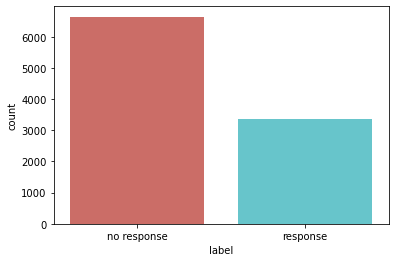

In [2]:
import pandas as pd
import seaborn as sns
dataframe=pd.read_csv("C:/Users/surab/OneDrive/Desktop/Recruiting_Task/Recruiting_Task/Recruiting_Task_InputData.csv")
sns.countplot(x="label", data = dataframe, palette="hls")
plt.show()

In [ ]:
parser.add_argument( '--random', required=True, help='train random forest classifier.')

parser.add_argument( '--SVM', help='train SVM classifier')

parser.add_argument('--Logistic', help='train Logistic regression classifier')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics, svm
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import pickle as pkl



In [ ]:
dataframe=pd.read_csv("C:/Users/surab/OneDrive/Desktop/Recruiting_Task/Recruiting_Task/Recruiting_Task_InputData.csv")
count_no_res = len(dataframe[dataframe['label']== "no response"])
print("\n no response",count_no_res)
count_res = len(dataframe[dataframe['label']=="response"])
print("\n response",count_res)
pct_of_no_res = count_no_res/(count_no_res+count_res)
print("\n percentage of no response is", pct_of_no_res*100)
pct_of_res = count_res/(count_no_res+count_res)
print("\n percentage of response", pct_of_res*100)



print(dataframe.groupby("label").mean())
print(dataframe["family_status"].value_counts())
print(dataframe.groupby("lifestyle").mean())
print(dataframe.groupby("car").mean())
print(dataframe.groupby("family_status").mean())
print(dataframe.groupby("living_area").mean())

pd.crosstab(dataframe.lifestyle,dataframe.label).plot(kind='bar')
plt.title('response Frequency')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.show()
plt.savefig('purchase_fre_job')

table=pd.crosstab(dataframe.family_status,dataframe.label)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
plt.show()
plt.savefig('mariral_vs_pur_stack')


table=pd.crosstab(dataframe.living_area,dataframe.label)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')
plt.show()
plt.savefig('edu_vs_pur_stack')

dataframe.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()
plt.savefig('hist_age')

In [ ]:
fig=plt.figure
class Trainer():
    def __init__(self,path="C:/Users/surab/OneDrive/Desktop/Recruiting_Task/Recruiting_Task/Recruiting_Task_InputData.csv"):
        super().__init__()
        #self.dataset_path= path
        self.dataset=pd.read_csv(path)
        self.final_dataset=None
        self.cat_vars= ['lifestyle','family_status','car','living_area','sports']
        self.to_keep_vars=['lifestyle','family_status','car','living_area','sports','name','zip code','earnings']
        self.model = None
        self.X_train =None
        self.X_test=None
        self.y_train=None
        self.y_test =None
        self.tpr=None
        self.fpr=None
        self.auc=None


    def categorical_to_varibles(self):
        cat_vars=self.cat_vars
        #cat_vars=['lifestyle','family_status','car','living_area','sports']
        for var in cat_vars:
            cat_list='var'+'_'+var
            cat_list = pd.get_dummies(self.dataset[var], prefix=var)
            data1=self.dataset.join(cat_list)
            self.dataset=data1


    def to_keep_info(self):
        cat_vars=self.to_keep_vars
        #cat_vars=['lifestyle','family_status','car','living_area','sports','name','zip code','earnings']
        data_vars=self.dataset.columns.values.tolist()
        to_keep=[i for i in data_vars if i not in cat_vars]
        self.final_dataset = self.dataset[to_keep]


    def save_model(self, name):
        pkl.dump(self.model, open(name, 'wb'))


    def getdata(self):
        #get data
        X = self.final_dataset.loc[:, self.final_dataset.columns != 'label']
        y = self.final_dataset.loc[:, self.final_dataset.columns == 'label']
        ##### train test split
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size=0.3)
        
        
    def convert_to_numeric(self,labels):
        new_labels=[]
        for i in range(len(labels)):
            if labels[i]=='response':
                new_labels.append(1)
            else:
                new_labels.append(0)
        return new_labels
    
    def roc_curve(self, y_pred):
        y_pred = self.convert_to_numeric(y_pred)
        y_test = np.array(self.y_test).flatten()
        y_test = self.convert_to_numeric(y_test)
        
        #### compute fpr, tpr, thresholds and roc auc
        y_pred_proba = self.model.predict_proba(self.X_test)[::,1]
        self.fpr, self.tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
        self.auc = metrics.roc_auc_score(y_test, y_pred_proba)
        #plt.plot(fpr, tpr, label = "LogisticRegression, auc="+str(auc))
        #plt.legend(loc=4)
        #plt.show


    def RandomForestCLF(self):
        ##### random forest training
        self.model = RandomForestClassifier()
        self.model.fit(self.X_train, self.y_train.values.ravel())
        y_pred = self.model.predict(self.X_test)
        print('\n Accuracy of RandomForest regression classifier on test set: {:.2f}'.format(self.model.score(self.X_test, self.y_test)))
        c_matrix = confusion_matrix(self.y_test, y_pred)
        print("\n Random Forest c_Matrix", c_matrix)
        scores = cross_val_score(self.model, self.X_train, self.y_train.values.ravel(), cv=5)
        print('\n Random Forest Cross-Validation Accuracy Scores', scores)
        self.save_model('C:/Users/surab/OneDrive/Desktop/Recruiting_Task/Recruiting_Task/models/random_forest.pkl')
        self.roc_curve(y_pred)
        plt.subplot(2, 2,  1)
        plt.plot(self.fpr, self.tpr,  label = "RandomForest, auc="+str(self.auc))


    def LogisticRegressionCLF(self):
        #### Logistic Regression training
        self.model = LogisticRegression()
        self.model.fit(self.X_train, self.y_train.values.ravel())
        y_pred = self.model.predict(self.X_test)
        print('\n Accuracy of Logistic regression classifier on test set: {:.2f}'.format(self.model.score(self.X_test, self.y_test)))
        c_matrix = confusion_matrix(self.y_test, y_pred)
        print("\n Logistic Regression c_matric", c_matrix)
        scores = cross_val_score(self.model, self.X_train, self.y_train.values.ravel(), cv=5)
        print('\n Logistic Regression Cross-Validation Accuracy Scores', scores)
        self.save_model('C:/Users/surab/OneDrive/Desktop/Recruiting_Task/Recruiting_Task/models/Logistic_regression.pkl')
        self.roc_curve(y_pred)
        plt.subplot(2, 2,  2)
        plt.plot(self.fpr, self.tpr,  label = "LogisticRegression, auc="+str(self.auc))


    def SVMclf(self):
        ##### SVM training
        self.model= svm.SVC(kernel='poly', c=1,  probability=True)
        self.model.fit(self.X_train, self.y_train.values.ravel())
        y_pred = self.model.predict(self.X_test)
        print('\n Accuracy of Support Vector Machine classifier on test set: {:.2f}'.format(self.model.score(self.X_test, self.y_test)))
        c_matrix = confusion_matrix(self.y_test, y_pred)
        print("\n SVM C_matrix",c_matrix)
        scores = cross_val_score(self.model, self.X_train, self.y_train.values.ravel(), cv=5)
        print('\n SVM Cross-Validation Accuracy Scores', scores)
        self.save_model('C:/Users/surab/OneDrive/Desktop/Recruiting_Task/Recruiting_Task/models/SVM.pkl')
        self.roc_curve(y_pred)
        plt.subplot(2, 2,  3)
        plt.plot(self.fpr, self.tpr,  label = "SVM, auc="+str(self.auc))
        
    def KNNclf(self):
        self.model = KNeighborsClassifier(n_neighbors=5)
        self.model.fit(self.X_train, self.y_train.values.ravel())
        y_pred = self.model.predict(self.X_test)
        print('\n Accuracy of KNN classifier on test set: {:.2f}'.format(self.model.score(self.X_test, self.y_test)))
        ##### 
        c_matrix = confusion_matrix(self.y_test, y_pred)
        print("\n KNN c_matrix", c_matrix)
        scores = cross_val_score(self.model, self.X_train, self.y_train.values.ravel(), cv=5)
        print('\n KNN Cross-Validation Accuracy Scores', scores)
        self.save_model('C:/Users/surab/OneDrive/Desktop/Recruiting_Task/Recruiting_Task/models/KNN.pkl')
        self.roc_curve(y_pred)
        plt.subplot(2, 2,  4)
        plt.plot(self.fpr, self.tpr,  label = "KNN, auc="+str(self.auc))


    def Train(self, clf):
        ##### preprocess
        self.categorical_to_varibles()
        self.to_keep_info()
        self.getdata()
        if clf=='Random':
            self.RandomForestCLF()
        elif clf=='Logistic':
            self.LogisticRegressionCLF()
        elif clf =='SVM':
            self.SVMclf()
        elif clf == 'KNN':
            self.KNNclf()
        else:
            self.RandomForestCLF()
            self.LogisticRegressionCLF()
            self.SVMclf()
            self.KNNclf()
    plt.show()
    plt.savefig('Graphs.png')

if __name__=='__main__':
    cl = Trainer()
    cl.Train(clf = input(" "))